# PANDAS COMPLETE CHEATSHEET ( ALL OPERATIONS )


# CORE DATA STRUCTURES

In [2]:
import pandas as pd
import numpy as np


In [3]:
# Series = 1D labeled array
s = pd.Series([10, 20, 30], index=['a','b','c'])

# DataFrame = 2D table (rows + columns)
df = pd.DataFrame({
    'Name': ['A', 'B', 'C'],
    'Age': [20, 25, 30],
    'Score': [85, 90, 88]
})

# Index & column labels
df.index
df.columns
print(s,"\n")
print(df)
df.columns


a    10
b    20
c    30
dtype: int64 

  Name  Age  Score
0    A   20     85
1    B   25     90
2    C   30     88


Index(['Name', 'Age', 'Score'], dtype='object')

# OBJECT CREATION

In [4]:
# Series from list
a = pd.Series([1, 2, 3])

# DataFrame from dictionary
b = pd.DataFrame({'A':[1,2], 'B':[3,4]})

# DataFrame from NumPy array
c = pd.DataFrame(np.array([[1,2],[3,4]]), columns=['X','Y'])

# Empty DataFrame
d = pd.DataFrame()

print(a,"\n")
print(b,"\n")
print(c,"\n")
print(d,"\n")

0    1
1    2
2    3
dtype: int64 

   A  B
0  1  3
1  2  4 

   X  Y
0  1  2
1  3  4 

Empty DataFrame
Columns: []
Index: [] 



# INPUT / OUTPUT (I/O)

In [5]:
# Save DataFrame to CSV
df.to_csv('data.csv', index=False)

# Read CSV into DataFrame
pd.read_csv('data.csv')

# Save to Excel
df.to_excel('data.xlsx', index=False)

# Read Excel file
pd.read_excel('data.xlsx')

# Save to JSON
df.to_json('data.json')

# Read JSON file
pd.read_json('data.json')


,Name,Age,Score
0,A,20,85
1,B,25,90
2,C,30,88


In [6]:
import os
print(os.getcwd())


C:\Users\prasa\Documents\GENAIVERSITY\MACHINE LEARNING


# DATAFRAME / SERIES ATTRIBUTES

In [7]:
df.shape        # rows, columns
df.size         # total elements
df.ndim         # number of dimensions
df.dtypes       # data types of columns
df.info()       # summary of DataFrame
df.describe()   # statistical summary
df.values       # NumPy array view
df.empty        # check if DataFrame is empty
df.T            # transpose rows ↔ columns
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Score   3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Score   3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
None
        Age      Score
count   3.0   3.000000
mean   25.0  87.666667
std     5.0   2.516611
min    20.0  85.000000
25%    22.5  86.500000
50%    25.0  88.000000
75%    27.5  89.000000
max    30.0  90.000000


# INDEXING & SELECTION

In [8]:
# Select single column
df['Age']

# Select multiple columns
df[['Name', 'Score']]

# Select row by label
df.loc[0]

# Select rows & columns by label
df.loc[0:1, ['Name','Age']]

# Select row by index position
df.iloc[0]

# Select rows & columns by index position
df.iloc[0:2, 1:3]

# Fast scalar access (label-based)
df.at[0, 'Age']

# Fast scalar access (position-based)
df.iat[0, 1]


20

# BOOLEAN FILTERING

In [9]:
# Filter rows with condition
df[df['Age'] > 22]

# Multiple conditions
df[(df['Age'] > 22) & (df['Score'] > 85)]


,Name,Age,Score
1,B,25,90
2,C,30,88


# INDEX OPERATIONS

In [10]:
# Set column as index
df.set_index('Name')

# Reset index to default
df.reset_index()

# Rename columns
df.rename(columns={'Score':'Marks'})

# Sort by index
df.sort_index()

# Reorder rows by index list
df.reindex([0,2])


,Name,Age,Score
0,A,20,85
2,C,30,88


In [11]:
df.set_index('Score')

,Name,Age
Score,,
85,A,20
90,B,25
88,C,30


In [12]:
print(df.reset_index())

   index Name  Age  Score
0      0    A   20     85
1      1    B   25     90
2      2    C   30     88


In [13]:
print(df.sort_index())

  Name  Age  Score
0    A   20     85
1    B   25     90
2    C   30     88


In [14]:
print(df.reindex([0,2,1]))

  Name  Age  Score
0    A   20     85
2    C   30     88
1    B   25     90


# COLUMN OPERATIONS

In [15]:
# Add new column
df['Passed'] = df['Score'] > 85

# Drop column
print(df.drop(columns=['Passed']),"\n")

# Rename column
print(df.rename(columns={'Age':'Years'}),"\n")

# Insert column at specific position
print(df.insert(1, 'Sex', ['Male','Female','Male']),"\n")
print(df)

  Name  Age  Score
0    A   20     85
1    B   25     90
2    C   30     88 

  Name  Years  Score  Passed
0    A     20     85   False
1    B     25     90    True
2    C     30     88    True 

None 

  Name     Sex  Age  Score  Passed
0    A    Male   20     85   False
1    B  Female   25     90    True
2    C    Male   30     88    True


# DATA TYPES & CONVERSION

In [16]:
# Change data type
df['Age'].astype(float)

# Convert to best possible dtypes
df.convert_dtypes()

# Select numeric columns only
df.select_dtypes(include='number')

# Convert to numeric
pd.to_numeric(df['Age'])

# Convert strings to datetime
pd.to_datetime(['2024-01-01','2024-02-01'])


DatetimeIndex(['2024-01-01', '2024-02-01'], dtype='datetime64[ns]', freq=None)

In [17]:
print(df.select_dtypes(include='number'))

   Age  Score
0   20     85
1   25     90
2   30     88


In [18]:
print(df.select_dtypes(include=['object', 'bool']))

  Name     Sex  Passed
0    A    Male   False
1    B  Female    True
2    C    Male    True


In [19]:
print(pd.to_datetime(['2024-01-01','2024-02-01']))

DatetimeIndex(['2024-01-01', '2024-02-01'], dtype='datetime64[ns]', freq=None)


# MISSING DATA HANDLING

In [20]:
df2 = pd.DataFrame({'A':[1,np.nan,3]})

df2.isna()        # detect missing values
df2.notna()       # detect non-missing values
df2.dropna()      # remove missing rows
df2.fillna(0)     # replace missing with value
df2.ffill()       # forward fill
df2.bfill()       # backward fill
df2.interpolate() # estimate missing values


,A
0,1.0
1,2.0
2,3.0


In [21]:
df2 = pd.DataFrame({'A':[1,np.nan,3]})
print(df2)
print(df2.isna())

     A
0  1.0
1  NaN
2  3.0
       A
0  False
1   True
2  False


In [22]:
print(df2.notna())

       A
0   True
1  False
2   True


In [23]:
print(df2.dropna())

     A
0  1.0
2  3.0


In [24]:
print(df2.fillna(0))

     A
0  1.0
1  0.0
2  3.0


In [25]:
print(df2.ffill())

     A
0  1.0
1  1.0
2  3.0


In [26]:
print(df2.bfill())

     A
0  1.0
1  3.0
2  3.0


In [27]:
print(df2.interpolate())

     A
0  1.0
1  2.0
2  3.0


# DATA CLEANING

In [28]:
print(df.replace(85, 86))          # replace values
print(df.where(df['Score'] > 85)) # keep rows matching condition
print(df.mask(df['Score'] < 88))  # mask rows not matching
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].clip(lower=25)        # limit minimum values. Values greater than or equal to 22 stay unchanged
print(df.round(1))               # round numbers. keep 1 digit after the decimal point


  Name     Sex  Age  Score  Passed
0    A    Male   20     86   False
1    B  Female   25     90    True
2    C    Male   30     88    True
  Name     Sex   Age  Score Passed
0  NaN     NaN   NaN    NaN    NaN
1    B  Female  25.0   90.0   True
2    C    Male  30.0   88.0   True
  Name     Sex   Age  Score Passed
0  NaN     NaN   NaN    NaN    NaN
1    B  Female  25.0   90.0   True
2    C    Male  30.0   88.0   True
  Name     Sex  Age  Score  Passed
0    A    Male   25     85   False
1    B  Female   25     90    True
2    C    Male   30     88    True


# APPLY / MAP / TRANSFORM

In [29]:
# Apply function element-wise
# print(df['Score'].apply(lambda x: x+5))

# Apply function column-wise
print(df.mean(numeric_only=True))

# Map values using dictionary
df['Name'].map({'A':'Alpha','B':'Beta','C':'Gamma'})

# Transform keeping same shape
df.transform(lambda x: x*2 if x.dtype!='object' else x)


Age       26.666667
Score     87.666667
Passed     0.666667
dtype: float64


,Name,Sex,Age,Score,Passed
0,A,Male,50,170,0
1,B,Female,50,180,2
2,C,Male,60,176,2


In [30]:
df['Name'].map({'A':'Alpha','B':'Beta','C':'Gamma'})
print(df)


  Name     Sex  Age  Score  Passed
0    A    Male   25     85   False
1    B  Female   25     90    True
2    C    Male   30     88    True


In [31]:
print(df.transform(lambda x: x*2 if x.dtype!='object' else x))

  Name     Sex  Age  Score  Passed
0    A    Male   50    170       0
1    B  Female   50    180       2
2    C    Male   60    176       2


# SORTING & RANKING

In [32]:
df.sort_values('Score')     # sort by column
df.sort_index()             # sort by index
df.rank()                   # rank values
df.nlargest(2, 'Score')     # top N values. Giving the top 2 highest Scores
df.nsmallest(2, 'Score')    # bottom N values


,Name,Sex,Age,Score,Passed
0,A,Male,25,85,False
2,C,Male,30,88,True


In [33]:
print(df.rank())

   Name  Sex  Age  Score  Passed
0   1.0  2.5  1.5    1.0     1.0
1   2.0  1.0  1.5    3.0     2.5
2   3.0  2.5  3.0    2.0     2.5


In [34]:
print(df.nlargest(2, 'Score'))

  Name     Sex  Age  Score  Passed
1    B  Female   25     90    True
2    C    Male   30     88    True


In [35]:
print(df)

  Name     Sex  Age  Score  Passed
0    A    Male   25     85   False
1    B  Female   25     90    True
2    C    Male   30     88    True


In [36]:
print(df.sort_values('Score'))

  Name     Sex  Age  Score  Passed
0    A    Male   25     85   False
2    C    Male   30     88    True
1    B  Female   25     90    True


In [37]:
print(df.nsmallest(2, 'Score'))

  Name   Sex  Age  Score  Passed
0    A  Male   25     85   False
2    C  Male   30     88    True


# DESCRIPTIVE STATISTICS

In [44]:
df.count()                  # non-null count
df.value_counts('Name')     # frequency count
df['Name'].unique()         # unique values
df.nunique()                # count unique values

df.mean(numeric_only=True)
df.median(numeric_only=True)
df.std(numeric_only=True)
df.var(numeric_only=True)
df['Score'].quantile(0.5)
df.corr(numeric_only=True)
df.cov(numeric_only=True)


,Age,Score,Passed
Age,8.333333,0.833333,0.833333
Score,0.833333,6.333333,1.333333
Passed,0.833333,1.333333,0.333333


In [45]:
df.value_counts('Score')

Score
85    1
88    1
90    1
Name: count, dtype: int64

In [46]:
print(df.count())

Name      3
Sex       3
Age       3
Score     3
Passed    3
dtype: int64


In [47]:
print(df['Name'].unique())

['A' 'B' 'C']


In [48]:
print(df.nunique())

Name      3
Sex       2
Age       2
Score     3
Passed    2
dtype: int64


# GROUPBY OPERATIONS

In [49]:
# Group and compute mean
print(df.groupby('Name')['Score'].mean())

# Multiple aggregations
print(df.groupby('Name').agg({'Score':'mean','Age':'max'}))

# Transform within group
print(df.groupby('Name').transform('mean', numeric_only=True))


# Filter groups
print(df.groupby('Name').filter(lambda x: len(x) > 0))


Name
A    85.0
B    90.0
C    88.0
Name: Score, dtype: float64
      Score  Age
Name            
A      85.0   25
B      90.0   25
C      88.0   30
    Age  Score  Passed
0  25.0   85.0     0.0
1  25.0   90.0     1.0
2  30.0   88.0     1.0
  Name     Sex  Age  Score  Passed
0    A    Male   25     85   False
1    B  Female   25     90    True
2    C    Male   30     88    True


# MERGE / JOIN / CONCAT

In [50]:
# Concatenate DataFrames
pd.concat([df, df])

df2 = pd.DataFrame({'Name':['A','B'], 'City':['X','Y']})

# SQL-style join
pd.merge(df, df2, on='Name', how='left')

# Join using index
df.join(df2.set_index('Name'), on='Name')


,Name,Sex,Age,Score,Passed,City
0,A,Male,25,85,False,X
1,B,Female,25,90,True,Y
2,C,Male,30,88,True,NaN


# RESHAPING & PIVOTING

In [63]:
# Pivot table (aggregation)
df.pivot_table(values='Score', index='Name', aggfunc='mean')

# Convert wide → long format
df.melt(id_vars='Name') # Columns become rows

# Stack columns into rows
df.stack()

# Unstack rows into columns
df.unstack()

# Cross-tabulation
pd.crosstab(df['Name'], df['Passed']) # It counts how many times each combination occurs.

# Explode list-like values
df.explode('Name') # split list-like values in a column into multiple rows.


,Name,Sex,Age,Score,Passed
0,A,Male,25,85,False
1,B,Female,25,90,True
2,C,Male,30,88,True


In [83]:
print(df.stack())

0  Name           A
   Sex         Male
   Age           25
   Score         85
   Passed     False
1  Name           B
   Sex       Female
   Age           25
   Score         90
   Passed      True
2  Name           C
   Sex         Male
   Age           30
   Score         88
   Passed      True
dtype: object


In [64]:
print(df.pivot_table(values='Score', index='Name', aggfunc='mean'))

      Score
Name       
A      85.0
B      90.0
C      88.0


In [65]:
print(df.melt(id_vars='Name'))

   Name variable   value
0     A      Sex    Male
1     B      Sex  Female
2     C      Sex    Male
3     A      Age      25
4     B      Age      25
5     C      Age      30
6     A    Score      85
7     B    Score      90
8     C    Score      88
9     A   Passed   False
10    B   Passed    True
11    C   Passed    True


In [66]:
print(pd.crosstab(df['Name'], df['Passed']))

Passed  False  True 
Name                
A           1      0
B           0      1
C           0      1


In [67]:
print(df.explode('Name'))

  Name     Sex  Age  Score  Passed
0    A    Male   25     85   False
1    B  Female   25     90    True
2    C    Male   30     88    True


# STRING OPERATIONS

In [68]:
df['Name'].str.lower()      # lowercase
df['Name'].str.upper()      # uppercase
df['Name'].str.contains('A')# check substring
df['Name'].str.replace('A','X')
df['Name'].str.len()        # string length
df['Name'].str.split()      # split strings



0    [A]
1    [B]
2    [C]
Name: Name, dtype: object

# DATETIME & TIME SERIES

In [69]:
dates = pd.date_range('2024-01-01', periods=5)
ts = pd.Series(range(5), index=dates)

ts.resample('D').mean()     # resample time data
ts.shift(1)                 # shift values
ts.rolling(2).mean()        # moving average
ts.expanding().mean()       # cumulative mean
ts.ewm(span=2).mean()       # exponential moving avg


2024-01-01    0.000000
2024-01-02    0.750000
2024-01-03    1.615385
2024-01-04    2.550000
2024-01-05    3.520661
Freq: D, dtype: float64

# WINDOW FUNCTIONS

In [70]:
df['Score'].rolling(2).mean()   # rolling window
df['Score'].expanding().sum()   # expanding window
df['Score'].ewm(span=2).mean()  # exponential window


0    85.000000
1    88.750000
2    88.230769
Name: Score, dtype: float64

# DUPLICATES

In [71]:
df.duplicated()        # mark duplicates
df.drop_duplicates()  # remove duplicates


,Name,Sex,Age,Score,Passed
0,A,Male,25,85,False
1,B,Female,25,90,True
2,C,Male,30,88,True


# COMPARISON & LOGICAL OPS

In [72]:
df['Age'].eq(25)       # equal to
df['Age'].gt(22)       # greater than
df['Name'].isin(['A','C'])  # membership check


0     True
1    False
2     True
Name: Name, dtype: bool

# CATEGORICAL DATA

In [73]:
df['Name'] = df['Name'].astype('category')
df['Name'].cat.categories  # category labels
df['Name'].cat.codes       # numeric codes


0    0
1    1
2    2
dtype: int8

# SAMPLING

In [74]:
df.sample(2)           # random rows
df.sample(frac=0.5)    # r-andom fraction


,Name,Sex,Age,Score,Passed
0,A,Male,25,85,False
1,B,Female,25,90,True


# QUERY & EVAL

In [75]:
df.query('Age > 22')   # SQL-like filtering
df.eval('Age + Score')# expression evaluation



0    110
1    115
2    118
dtype: int64

# MEMORY & PERFORMANCE

In [76]:
df.memory_usage()                # memory per column
df.info(memory_usage='deep')     # deep memory info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    3 non-null      category
 1   Sex     3 non-null      object  
 2   Age     3 non-null      int64   
 3   Score   3 non-null      int64   
 4   Passed  3 non-null      bool    
dtypes: bool(1), category(1), int64(2), object(1)
memory usage: 605.0 bytes


# PLOTTING

<Axes: xlabel='Age', ylabel='Score'>

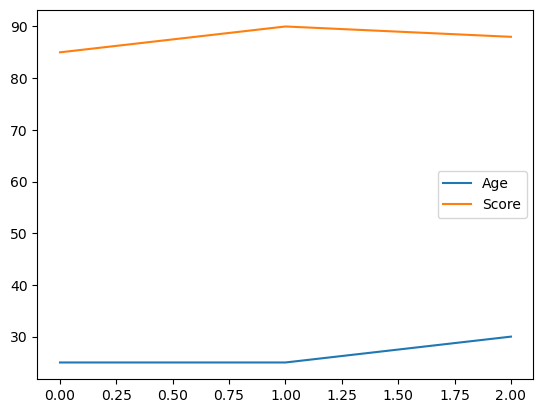

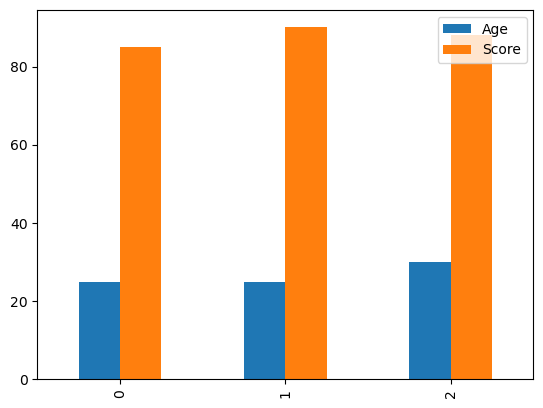

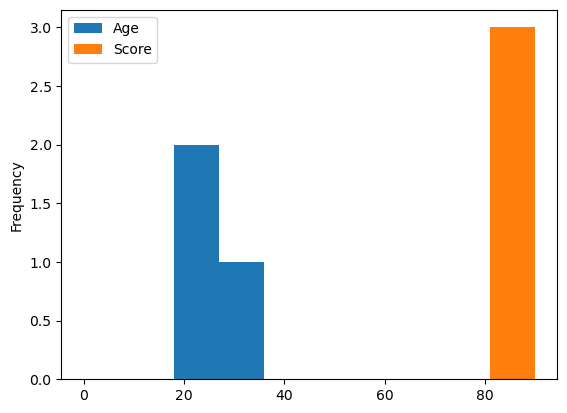

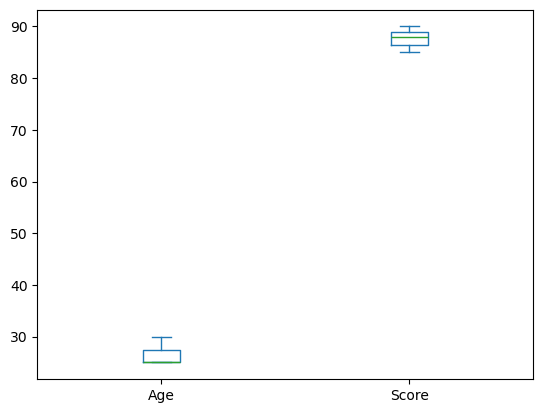

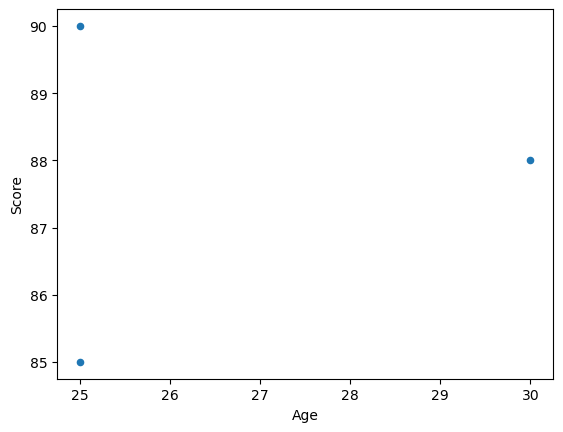

In [77]:
df.plot()                         # line plot
df.plot(kind='bar')               # bar chart
df.plot(kind='hist')              # histogram
df.plot(kind='box')               # box plot
df.plot(kind='scatter', x='Age', y='Score')


# MULTIINDEX

In [87]:
arrays = [['A','A','B'], [1,2,1]]
idx = pd.MultiIndex.from_arrays(arrays, names = ['AA','BB'])

# Hierarchical index Series
.-pd.Series([10,20,30], index=idx)


AA  BB
A   1     10
    2     20
B   1     30
dtype: int64

# SPARSE DATA

In [79]:
pd.arrays.SparseArray([0,0,1,0])  # memory-efficient array


[0, 0, 1, 0]
Fill: 0
IntIndex
Indices: array([2])

# ERROR HANDLING & VALIDATION


In [80]:
pd.to_numeric(['1','a'], errors='coerce')  # invalid → NaN
pd.merge(df, df2, on='Name', validate='many_to_one')


,Name,Sex,Age,Score,Passed,City
0,A,Male,25,85,False,X
1,B,Female,25,90,True,Y


# PANDAS OPTIONS

In [88]:
pd.set_option('display.max_rows', 100)  # set option
pd.get_option('display.max_rows')       # get option
pd.reset_option('display.max_rows')     # reset option
